In [12]:
from surprise import SVD
from surprise import Dataset, Reader, accuracy
from surprise.model_selection import cross_validate
import matplotlib.pyplot as plt
from src_starter.train_valid_test_loader import load_train_valid_test_datasets
from src_starter.CollabFilterOneVectorPerItem import CollabFilterOneVectorPerItem
import numpy as np

In [17]:
# Load the dataset
train_tuple, valid_tuple, test_tuple, n_users, n_items = load_train_valid_test_datasets()

# Set the number of factors to try
n_factors_list = [2, 10, 50]

# Create subplots for the trace plots
fig, axs = plt.subplots(1, len(n_factors_list), figsize=(15, 5))

for i, n_factors in enumerate(n_factors_list):
    # Create the model and initialize its parameters
    model = CollabFilterOneVectorPerItem(
        n_epochs=64, batch_size=32, step_size=0.2, n_factors=n_factors, alpha=0.0
    )
    model.init_parameter_dict(n_users, n_items, train_tuple)
    
    # Fit the model with SGD
    model.fit(train_tuple, valid_tuple)
    
    # Plot the MAE trace
    axs[i].plot(model.trace_epoch, model.trace_mae_train, label='Training')
    axs[i].plot(model.trace_epoch, model.trace_mae_valid, label='Validation')
    axs[i].set_xlabel('Epoch')
    axs[i].set_ylabel('MAE')
    axs[i].set_title(f'K = {n_factors}')

plt.tight_layout()
plt.show()

epoch       0.000 | loss_total     1.37500 | train_AUC    0.50269 | valid_AUC     0.49616 | grad_wrt_mu     0.25000 | grad_wrt_b_per_user     0.00212 | grad_wrt_c_per_item     0.00119 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.000 | loss_total     1.34411 | train_AUC    0.50717 | valid_AUC     0.50111 | grad_wrt_mu     1.08438 | grad_wrt_b_per_user     0.00202 | grad_wrt_c_per_item     0.00113 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.001 | loss_total     1.44366 | train_AUC    0.51518 | valid_AUC     0.51697 | grad_wrt_mu     0.52112 | grad_wrt_b_per_user     0.00198 | grad_wrt_c_per_item     0.00124 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.001 | loss_total     1.15573 | train_AUC    0.53701 | valid_AUC     0.53462 | grad_wrt_mu     0.12048 | grad_wrt_b_per_user     0.00182 | grad_wrt_c_per_item     0.00105 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.125 | loss_total     1.09206 | train_AUC    0.7261

epoch       0.000 | loss_total     1.06250 | train_AUC    0.50235 | valid_AUC     0.50524 | grad_wrt_mu     0.62500 | grad_wrt_b_per_user     0.00172 | grad_wrt_c_per_item     0.00097 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.000 | loss_total     1.68783 | train_AUC    0.51570 | valid_AUC     0.51612 | grad_wrt_mu     0.12734 | grad_wrt_b_per_user     0.00219 | grad_wrt_c_per_item     0.00122 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.001 | loss_total     1.07169 | train_AUC    0.52778 | valid_AUC     0.53217 | grad_wrt_mu     1.04947 | grad_wrt_b_per_user     0.00159 | grad_wrt_c_per_item     0.00089 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.001 | loss_total     0.96066 | train_AUC    0.53178 | valid_AUC     0.53221 | grad_wrt_mu     0.31607 | grad_wrt_b_per_user     0.00166 | grad_wrt_c_per_item     0.00095 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.125 | loss_total     0.97275 | train_AUC    0.7269

IndexError: index 3 is out of bounds for axis 0 with size 3

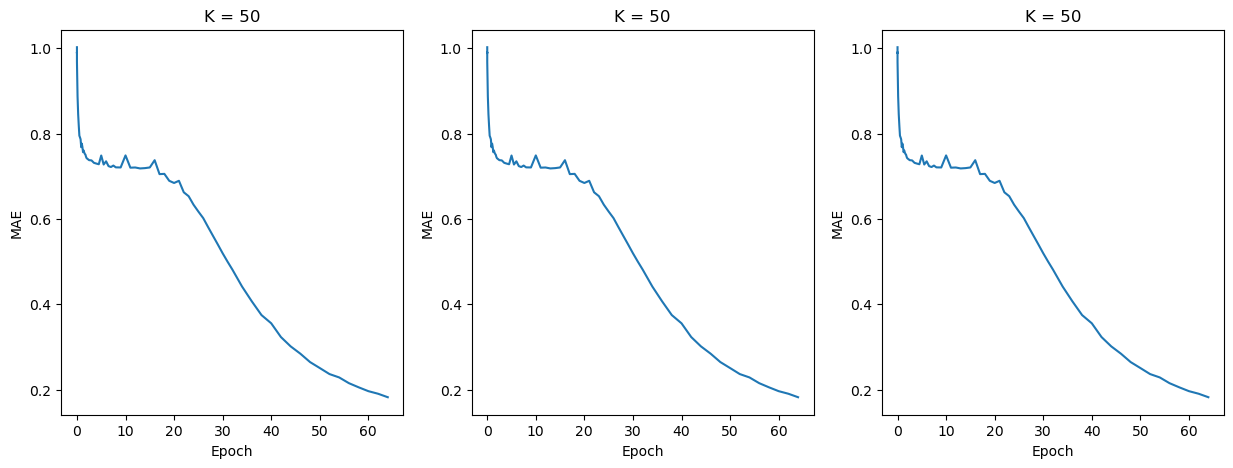

In [ ]:
# Load the dataset
train_tuple, valid_tuple, test_tuple, n_users, n_items = load_train_valid_test_datasets()

# Set the number of factors to try
alphas = np.logspace(-5, 0)

# Create subplots for the trace plots
fig, axs = plt.subplots(1, len(alphas), figsize=(15, 5))

for i, alpha in enumerate(alphas):
    # Create the model and initialize its parameters
    model = CollabFilterOneVectorPerItem(
        n_epochs=64, batch_size=32, step_size=0.2, n_factors=50, alpha=alpha
    )
    model.init_parameter_dict(n_users, n_items, train_tuple)
    
    # Fit the model with SGD
    model.fit(train_tuple, valid_tuple)
    
    # Plot the MAE trace
    axs[i].plot(model.trace_epoch, model.trace_mae_train, label="Training")
    axs[i].plot(model.trace_epoch, model.trace_mae_valid, label="Validation")
    axs[i].set_xlabel('Epoch')
    axs[i].set_ylabel('MAE')
    axs[i].set_title(f'K = {n_factors}')

plt.tight_layout()
plt.show()